In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "runTest-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20201007-Maria-pt-table-new.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",")
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,filename,Sample
0,MS-200109-1,MS-200109-1,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S1,GC,human,BCRh,tonsil,NaN,no,MS-200109-1_S1_L001_R1_001.fastq.gz,MS-200109-1_S1
1,MS-200109-2,MS-200109-2,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S2,GC,human,BCRh,GC1,NaN,no,MS-200109-2_S2_L001_R1_001.fastq.gz,MS-200109-2_S2
2,MS-200109-3,MS-200109-3,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S3,GC,human,BCRh,GC2,NaN,no,MS-200109-3_S3_L001_R1_001.fastq.gz,MS-200109-3_S3
3,MS-200109-4,MS-200109-4,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S4,GC,human,BCRh,GC3,NaN,no,MS-200109-4_S4_L001_R1_001.fastq.gz,MS-200109-4_S4
4,MS-200109-5,MS-200109-5,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S5,GC,human,BCRh,GC4,NaN,no,MS-200109-5_S5_L001_R1_001.fastq.gz,MS-200109-5_S5


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones")]
myfiles.sort()
myfiles = myfiles[-4:]
myfiles

['cdr3-clones-GC1-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-GC2-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-GC3-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-GC4-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,MS-200109-1_S1,CAHGMARPRQWDTVVDFDYWGQGTLVT,595
1,MS-200109-1_S1,CARSLDPLDFQHWGQGTLVT,310
2,MS-200109-1_S1,CARGRGSGSWNFDYWGQGTLVT,262
3,MS-200109-1_S1,CAHSSVVIVLHAFDIWGQGTMVT,240
4,MS-200109-1_S1,CARPSSSYSSSLDYWGQGTLVT,220


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
14533,MS-85_S10,YARGYRLRSSYFDYWGQGTLVT,1
14534,MS-85_S10,YARTNITMIGINDLWGQGTLVT,1
14535,MS-85_S10,YARVANPIRGVLVYFDYWGQGTLVT,1
14536,MS-85_S10,YASSGWDYYYYGMDVWGQGTTVT,1
14537,MS-85_S10,YTVALDAFDIWGQGTMVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,filename
0,MS-200109-1_S1,CAHGMARPRQWDTVVDFDYWGQGTLVT,595,MS-200109-1,MS-200109-1,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S1,GC,human,BCRh,tonsil,NaN,no,MS-200109-1_S1_L001_R1_001.fastq.gz
1,MS-200109-1_S1,CARSLDPLDFQHWGQGTLVT,310,MS-200109-1,MS-200109-1,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S1,GC,human,BCRh,tonsil,NaN,no,MS-200109-1_S1_L001_R1_001.fastq.gz
2,MS-200109-1_S1,CARGRGSGSWNFDYWGQGTLVT,262,MS-200109-1,MS-200109-1,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S1,GC,human,BCRh,tonsil,NaN,no,MS-200109-1_S1_L001_R1_001.fastq.gz
3,MS-200109-1_S1,CAHSSVVIVLHAFDIWGQGTMVT,240,MS-200109-1,MS-200109-1,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S1,GC,human,BCRh,tonsil,NaN,no,MS-200109-1_S1_L001_R1_001.fastq.gz
4,MS-200109-1_S1,CARPSSSYSSSLDYWGQGTLVT,220,MS-200109-1,MS-200109-1,NaN,NaN,NaN,NaN,NaN,NaN,RUNMARIA,S1,GC,human,BCRh,tonsil,NaN,no,MS-200109-1_S1_L001_R1_001.fastq.gz


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,C_1,MS-200109-8_S8,CAAAIFGVIDESFDPWGQGTLVT,1
1,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWAQGTLVT,1
2,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGALVT,1
3,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGILVT,3
4,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGSLVT,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,MS-200109-13_S13,162488
1,MS-200109-14_S14,204351
2,MS-200109-15_S15,224979
3,MS-200109-16_S16,156817
4,MS-200109-17_S17,134399


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,C_1,MS-200109-8_S8,CAAAIFGVIDESFDPWGQGTLVT,1,92494
1,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWAQGTLVT,1,92494
2,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGALVT,1,92494
3,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGILVT,3,92494
4,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGSLVT,1,92494


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
72653,unknown,MS-42_S18,RARDPPSWYVGNYYYYGMDVWGQGTTVT,3,69112
72654,unknown,MS-42_S18,RARDPSDYGGFDYWGQGTLVT,1,69112
72655,unknown,MS-42_S18,RARIGGPYHDNRGYLPFDYWGQGTLVT,1,69112
72656,unknown,MS-42_S18,YARDPPSWYVGNYYYYGMDVWGQGTTVT,3,69112
72657,unknown,MS-42_S18,YARQGIAAGQRYFDYWGQGTLVT,2,69112


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,C_1,MS-200109-8_S8,CAAAIFGVIDESFDPWGQGTLVT,1,92494,0.001081
1,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWAQGTLVT,1,92494,0.001081
2,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGALVT,1,92494,0.001081
3,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGILVT,3,92494,0.003243
4,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGSLVT,1,92494,0.001081


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['MS-200109-8_S8',
 'MS-200109-14_S14',
 'MS-200109-2_S2',
 'MS-21_S1',
 'MS-22_S2',
 'MS-40_S16',
 'MS-200109-15_S15',
 'MS-200109-3_S3',
 'MS-23_S3',
 'MS-24_S4']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,MS-200109-14_S14,MS-200109-8_S8,17.879041,0.003243
1,MS-200109-8_S8,MS-200109-2_S2,0.000000,0.000000
2,MS-200109-8_S8,MS-21_S1,0.000000,0.000000
3,MS-200109-8_S8,MS-22_S2,0.000000,0.000000
4,MS-200109-8_S8,MS-40_S16,0.000000,0.000000


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,MS-200109-14_S14,MS-200109-8_S8,17.879041,0.003243,GC1,C_1
1,MS-200109-3_S3,MS-200109-8_S8,20.143923,2.175276,GC2,C_1
2,MS-200109-16_S16,MS-200109-8_S8,13.620335,0.001081,GC3,C_1
3,MS-200109-4_S4,MS-200109-8_S8,6.643621,0.154605,GC3,C_1
4,MS-200109-20_S20,MS-200109-8_S8,2.465053,0.002162,GC4,C_1


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,58,MS-23_S3,MS-24_S4,99.657515,99.640338,GC2,GC2
1,557,MS-82_S7,MS-83_S8,99.420243,99.345131,Unknown,Unknown
2,698,MS-200109-1_S1,MS-200109-7_S7,92.711838,90.449530,tonsil,tonsil
3,368,MS-85_S10,MS-76_S1,80.135693,79.500793,Unknown,Unknown
4,387,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,58,MS-23_S3,MS-24_S4,99.657515,99.640338,GC2,GC2,same
1,557,MS-82_S7,MS-83_S8,99.420243,99.345131,Unknown,Unknown,same
2,698,MS-200109-1_S1,MS-200109-7_S7,92.711838,90.449530,tonsil,tonsil,same
3,368,MS-85_S10,MS-76_S1,80.135693,79.500793,Unknown,Unknown,same
4,387,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote runTest-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,58,MS-23_S3,MS-24_S4,99.657515,99.640338,GC2,GC2,same
1,1,557,MS-82_S7,MS-83_S8,99.420243,99.345131,Unknown,Unknown,same
2,2,698,MS-200109-1_S1,MS-200109-7_S7,92.711838,90.449530,tonsil,tonsil,same
3,3,368,MS-85_S10,MS-76_S1,80.135693,79.500793,Unknown,Unknown,same
4,4,387,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,58,MS-23_S3,MS-24_S4,99.657515,99.640338,GC2,GC2,same,MS-23_S3->MS-24_S4,purple
1,1,557,MS-82_S7,MS-83_S8,99.420243,99.345131,Unknown,Unknown,same,MS-82_S7->MS-83_S8,purple
2,2,698,MS-200109-1_S1,MS-200109-7_S7,92.711838,90.449530,tonsil,tonsil,same,MS-200109-1_S1->MS-200109-7_S7,purple
3,3,368,MS-85_S10,MS-76_S1,80.135693,79.500793,Unknown,Unknown,same,MS-85_S10->MS-76_S1,purple
4,4,387,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown,same,MS-77_S2->MS-76_S1,purple


Wrote runTest-IGH-HUMAN-shared-clones-all.pdf to disk


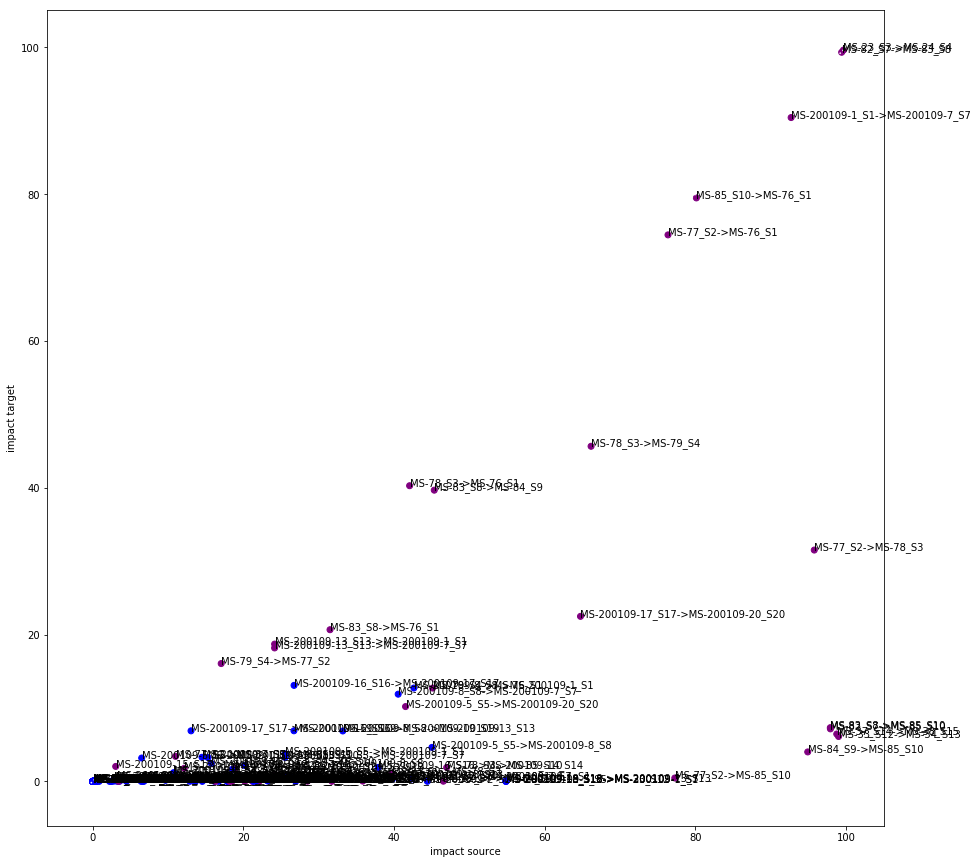

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,14,MS-200109-16_S16,MS-200109-17_S17,26.734346,13.083431,different,MS-200109-16_S16->MS-200109-17_S17,blue
1,15,MS-200109-8_S8,MS-200109-1_S1,42.637360,12.720923,different,MS-200109-8_S8->MS-200109-1_S1,blue
2,17,MS-200109-8_S8,MS-200109-7_S7,40.553982,11.883524,different,MS-200109-8_S8->MS-200109-7_S7,blue
3,21,MS-200109-16_S16,MS-200109-19_S19,26.719042,6.898358,different,MS-200109-16_S16->MS-200109-19_S19,blue
4,22,MS-200109-17_S17,MS-200109-19_S19,13.057389,6.889787,different,MS-200109-17_S17->MS-200109-19_S19,blue


Wrote runTest-IGH-HUMAN-shared-clones-different-ids.pdf to disk


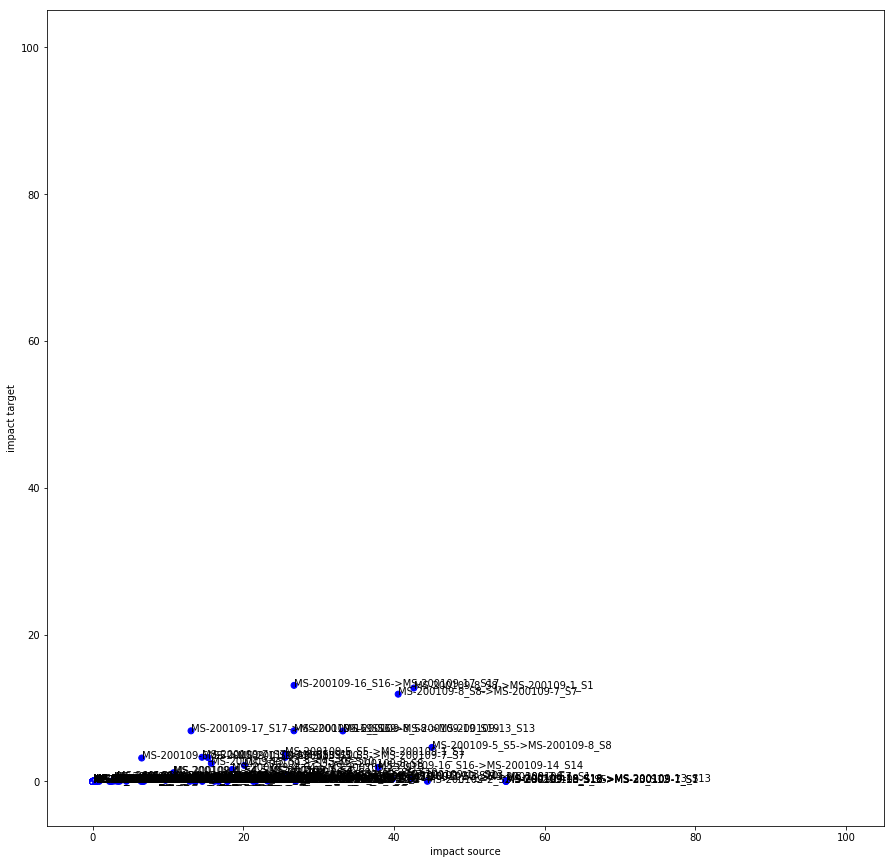

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,C_1,MS-200109-8_S8,CAAAIFGVIDESFDPWGQGTLVT,1,92494,0.001081
1,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWAQGTLVT,1,92494,0.001081
2,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGALVT,1,92494,0.001081
3,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGILVT,3,92494,0.003243
4,C_1,MS-200109-8_S8,CAAAIFGVIDESFDYWGQGSLVT,1,92494,0.001081


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient           Sample                  
                       nunique    names nunique             names
cdr3pep                                                          
AWGYWGQGTLVT                 1  Unknown       1         MS-85_S10
CAAAELGLINYFDYSGQGTLVT       1   tonsil       1  MS-200109-13_S13
CAAAELGLINYFDYWGQGTLVT       1   tonsil       1  MS-200109-13_S13
CAAAFLMTHNWFDPWGQGTLVT       1   tonsil       1  MS-200109-13_S13
CAAAFLVTHNCFDPWGQGTLVT       1   tonsil       1    MS-200109-7_S7

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient                 cdr3pep            C_1              GC1  \
Sample                          MS-200109-8_S8 MS-200109-14_S14   
0                  AWGYWGQGTLVT            NaN              NaN   
1        CAAAELGLINYFDYSGQGTLVT            NaN              NaN   
2        CAAAELGLINYFDYWGQGTLVT            NaN              NaN   
3        CAAAFLMTHNWFDPWGQGTLVT            NaN              NaN   
4        CAAAFLVTHNCFDPWGQGTLVT            NaN              NaN   

Patient                                       GC10              GC2  \
Sample  MS-200109-2_S2 MS-21_S1 MS-22_S2 MS-40_S16 MS-200109-15_S15   
0                  NaN      NaN      NaN       NaN              NaN   
1                  NaN      NaN      NaN       NaN              NaN   
2                  NaN      NaN      NaN       NaN              NaN   
3                  NaN      NaN      NaN       NaN              NaN   
4                  NaN      NaN      NaN       NaN              NaN   

Patient                          ...  Unknown                             \
Sample  MS-200109-3_S3 MS-23_S3  ... MS-79_S4 MS-82_S7 MS-83_S8 MS-84_S9   
0                  NaN      NaN  ...      NaN      NaN      NaN      NaN   
1                  NaN      NaN  ...      NaN      NaN      NaN      NaN   
2                  NaN      NaN  ...      NaN      NaN      NaN      NaN   
3                  NaN      NaN  ...      NaN      NaN      NaN      NaN   
4                  NaN      NaN  ...      NaN      NaN      NaN      NaN   

Patient                     tonsil                                 unknown  \
Sample  MS-85_S10 MS-200109-13_S13 MS-200109-1_S1 MS-200109-7_S7 MS-41_S17   
0        0.004391              NaN            NaN            NaN       NaN   
1             NaN         0.000615            NaN            NaN       NaN   
2             NaN         0.016617            NaN            NaN       NaN   
3             NaN         0.000615            NaN            NaN       NaN   
4             NaN              NaN            NaN       0.004067       NaN   

Patient            
Sample  MS-42_S18  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 43 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/home/barbera/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


index                     cdr3pep Patient  \
                                     nunique   
0  38267      CARPSSSYSSSLDYWGQGTLVT       6   
1  31218      CARGRGSGSWNFDYWGQGTLVT       5   
2  48447  CASSRYDSSGYYWLSFDYWGQGTLVT       5   
3   3497     CAHSSVVIVLHAFDIWGQGTMVT       4   
4    190           CADIGAFDIWGQGTLVT       4   

                                        Sample  \
                                 names nunique   
0  GCb, GC3, tonsil, C_1, GC4, Unknown       8   
1       GC3, tonsil, C_1, GC4, Unknown       8   
2       GC3, tonsil, C_1, GC4, Unknown       7   
3            GC4, tonsil, C_1, Unknown       8   
4            GC4, tonsil, C_1, Unknown       7   

                                                                C_1  \
                                               names MS-200109-8_S8   
0  MS-85_S10, MS-200109-5_S5, MS-200109-1_S1, MS-...       0.002162   
1  MS-85_S10, MS-200109-5_S5, MS-200109-1_S1, MS-...       0.003243   
2  MS-85_S10, MS-200109-5_S5, MS-200109-1_S1, MS-...       0.145955   
3  MS-85_S10, MS-200109-5_S5, MS-200109-1_S1, MS-...       0.001081   
4  MS-85_S10, MS-200109-5_S5, MS-200109-1_S1, MS-...       3.604558   

               GC1                          ...  Unknown                      \
  MS-200109-14_S14 MS-200109-2_S2 MS-21_S1  ... MS-79_S4  MS-82_S7  MS-83_S8   
0              NaN            NaN      NaN  ...      NaN       NaN       NaN   
1              NaN            NaN      NaN  ...      NaN       NaN       NaN   
2              NaN            NaN      NaN  ...      NaN       NaN       NaN   
3              NaN            NaN      NaN  ...      NaN  0.000958  0.000886   
4              NaN            NaN      NaN  ...      NaN       NaN       NaN   

                                tonsil                                \
   MS-84_S9 MS-85_S10 MS-200109-13_S13 MS-200109-1_S1 MS-200109-7_S7   
0       NaN  0.059283         0.382797       0.312309       0.295529   
1  0.002979  0.046109         0.737901       0.371932       0.387712   
2       NaN  0.010978         0.016617       0.031231       0.035247   
3       NaN  0.018663         0.006770       0.340701       0.295529   
4  0.000993  0.013174         0.096623       0.117826       0.117941   

    unknown            
  MS-41_S17 MS-42_S18  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

[5 rows x 48 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 56291
cdr3's in > 1 sample: 13615


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote runTest-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
